# 🌳 Decision Tree Regressor

> first go to [Decision Tree Classification](../Classification_Algos/Decision_Tree_Classifier.ipynb)

## 📘 Concept
A **Decision Tree Regressor** is a tree-based model used for predicting *continuous numeric values*.

Instead of splitting based on **Gini** or **Entropy** (like in classification),
it splits based on **variance reduction** — typically **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.

Each leaf node predicts the **average value** of samples in that leaf.

---

## 🧠 How It Works
1. The model starts with all training data at the root.
2. It looks for the best feature and threshold that minimize **MSE** after splitting.
3. The process repeats recursively, creating branches and leaves.
4. Prediction = mean value of target `y` in that leaf node.

---

## 📏 Key Parameters

| Parameter | Description |
|------------|-------------|
| `criterion` | Metric to measure split quality (`"squared_error"`, `"absolute_error"`) |
| `max_depth` | Limits how deep the tree can grow (controls overfitting) |
| `min_samples_split` | Minimum samples required to split an internal node |
| `min_samples_leaf` | Minimum samples required at a leaf node |
| `random_state` | Ensures reproducibility of results |

---

## ⚙️ Formula (for each split)
The tree tries to **minimize**:

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2
$$

Where  
- $y_i$: actual value  
- $\hat{y}$: predicted mean value in that node

---

## 🧩 Evaluation Metrics for Regression Trees

| Metric | Meaning |
|--------|----------|
| **MAE** (Mean Absolute Error) | Average absolute difference between predicted and actual |
| **MSE** (Mean Squared Error) | Average squared difference |
| **RMSE** (Root MSE) | Square root of MSE, easier to interpret |
| **R² Score** | Proportion of variance explained by the model (1 = perfect fit) |

---

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("assets/IceCreamData.csv")

X = df[["Temperature"]]
y = df["Revenue"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = DecisionTreeRegressor(criterion="squared_error", max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("R² Score:",r2)

MAE: 34.19251489546157
MSE: 1859.6600954822
R² Score: 0.9348876189843257


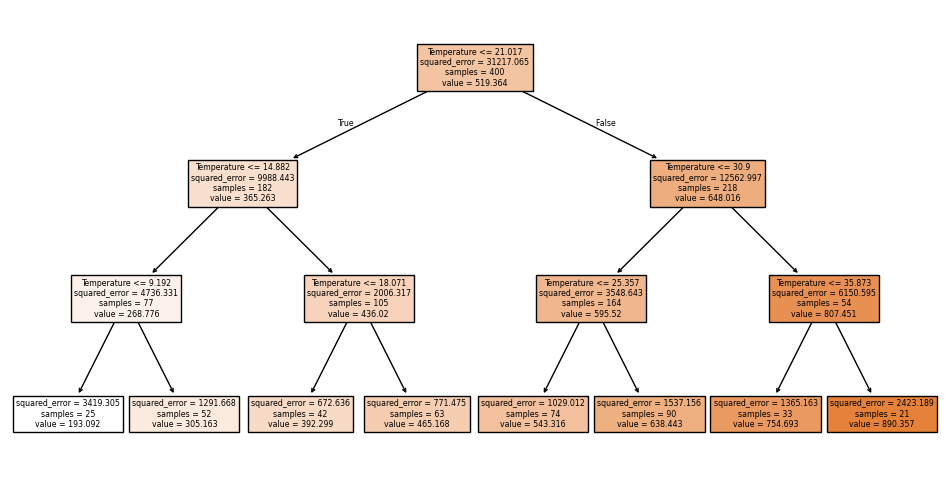

In [15]:
plt.figure(figsize=(12, 6))
tree.plot_tree(model, filled=True, feature_names=["Temperature"])
plt.show()

## ✅ When to Use

- Predict numeric outcomes (prices, marks, salaries, etc.)

- Non-linear data relationships

- When interpretability matters


## 💡 Pro Tip

- In real-world regression tasks, Decision Trees alone are often weak.
- We usually combine them into Random Forest Regressors or Gradient Boosting Regressors for better accuracy.